# Window Function Multipoles

Load modules.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from triumvirate.winconv import Multipole, ThreePointWindow

from config import DATADIR

/Users/mikesw/Documents/Documents/Projects/Triumvirate/src/triumvirate/winconv.py:89: ExperimentalWarning: The `triumvirate.winconv` module is currently experimental. Its behaviour has not been fully tested and may change in the future.
  warnings.warn(


Set I/O.

In [2]:
CATALOGUE_BASE = "LRG_complete_SGC_0.4z0.6"
FILE_STEM = f"zetaw{{}}_full_{CATALOGUE_BASE}_mock0_18xF"
MULTIPOLES = [
    Multipole('000'),
    Multipole('110'),
    Multipole('112'),
    Multipole('202'),
]

Load measurements.

In [3]:
windows = ThreePointWindow.load_from_file(
   DATADIR / "common" / "windows" / (FILE_STEM.format('') + ".npz")
)

Visualise measurements.

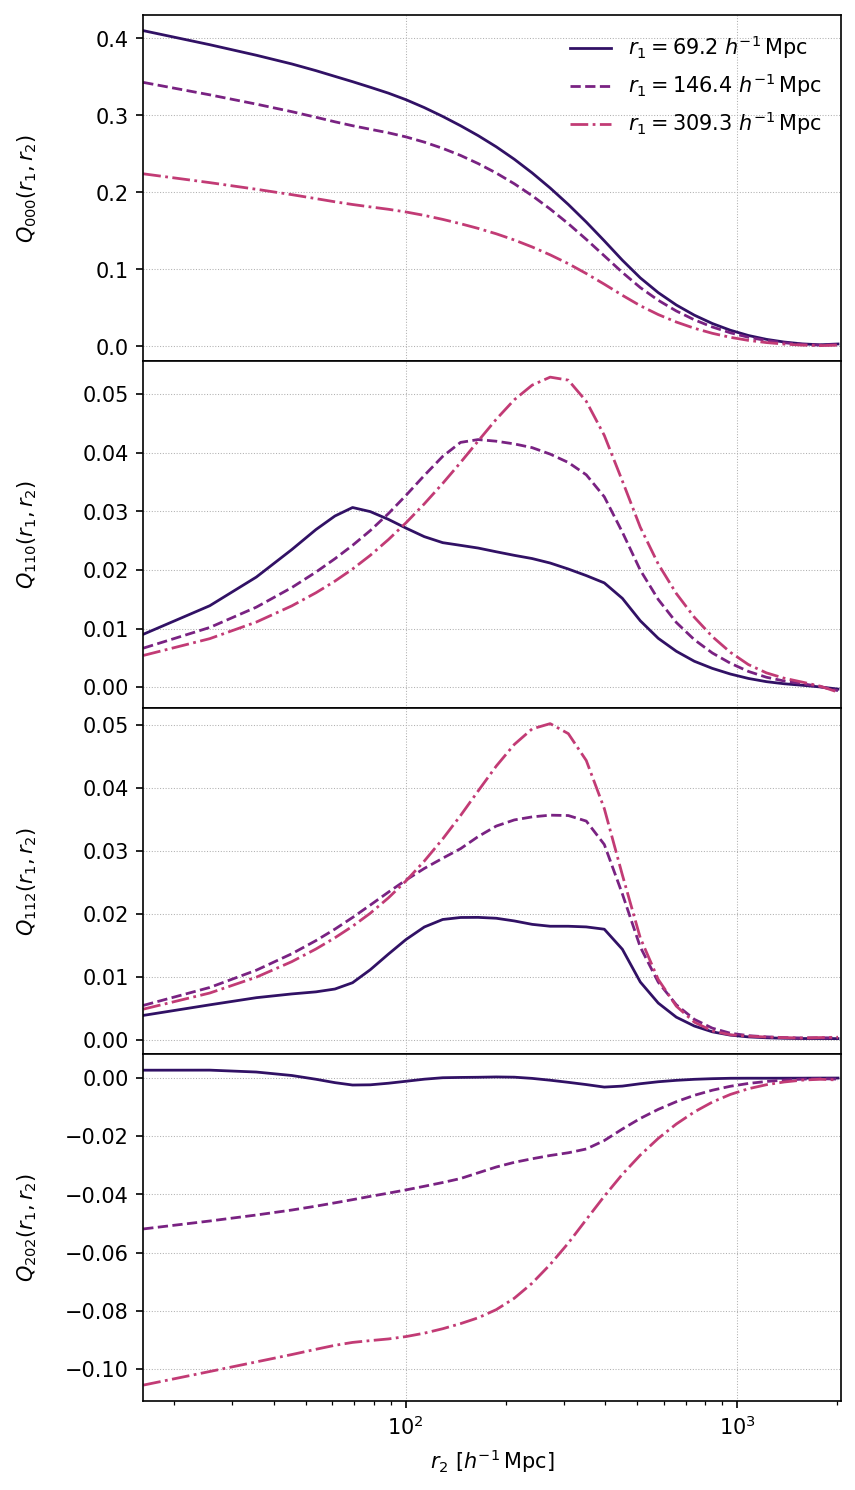

In [4]:
CMAP = plt.get_cmap('magma')

RANGE_DEMO = [6, 12, 18,]
LS_DEMO = ['-', '--', '-.']

fig, ax = plt.subplots(
    len(MULTIPOLES), 1,
    figsize=(6., 3.*len(MULTIPOLES)),
    sharex=True,
    dpi=150,
)
ax = ax if isinstance(ax, np.ndarray) else [ax]

for ax_, multipole in zip(ax, MULTIPOLES):
    r = windows.r[multipole]
    Q = windows.Q[multipole]

    for i, ls_ in zip(RANGE_DEMO, LS_DEMO):
        ax_.semilogx(
            r, Q[i],
            c=CMAP(i / len(Q)),
            ls=ls_, lw=1.33, marker=None,
            label=fr"$r_1 = {r[i]:.1f}~h^{{-1}}\,\mathrm{{Mpc}}$"
        )

    ax_.grid(True, which='major', ls=':', lw=0.5)

    ax_.set_xmargin(0.01)
    ax_.set_ymargin(0.05)
    ax_.set_xlim(r.min(), 2050.)

    if ax_ is ax[-1]:
        ax_.set_xlabel(r"$r_2$ [$h^{-1}\,\mathrm{Mpc}$]")
    ax_.set_ylabel(fr"$Q_{{{multipole.abstr}}}(r_1, r_2)$")

    ax_.yaxis.set_label_coords(-0.15, 0.5)

    if ax_ is ax[0]:
        ax_.legend(loc='best', frameon=False)

fig.subplots_adjust(hspace=0.)